# Logistic Regression

In this notebook, we first briefly introduce the concept of logistic regression. Then we illustrate the logistic regression algorithm and implement the logistic regression algorithm with python class. At last, we will implement the logistic regression algorithms into analysis of palmer penguins, where we want to judge the sex of penguins based on the penguins' other body data.

## Introduction

Despite the name, logistic Regression is a classification algorithm developed to model population growth in the 1830s by Pierre Francois Verhulst. In machine learning, it yields the probability of a binary event happening. It can be extended to multi0label classification by assigning a probability between 0 and 1 to each object where the sum of all object probabilities is 1. Logistic regression itself is not a classifier, but rather models the probability of an output based on the input.

Logistic regression is used in various fields, including machine learning, most medical fields, and social sciences.

## Algorithm

Instead of creating a single neuron model for predicting a class deterministic label, we will next build a single neuron model that predicts a *class probability*.

### Sigmoid activation function

As before, we must first decide on an activation function before deciding on a cost/ loss function. For this purpose, we choose the *sigmoid* activation function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This differentiable function has a range in $(0, 1)$, so it would seem suitable for a possible function to turn the pre-activation value into a value representing a probability. Moreover, the sigmoid function (sometimes called the *logistic function*) has a smooth "S"-shape that is perfect for probabilities values transitioning, either growing or shrinking, as the input feature changes.

### Cross Entropy loss function

Suppose that we have two target values, 0 and 1. Now we are wishing to predict that *probability of each of these labels given a single feature measurement*. Thus, we encounter the conditional probability function:

$$
P\Big(y^{(i)}\mid x^{(i)}\Big)=\begin{cases}
          \hat{y}^{(i)}, \quad &  y^{(i)} = 1 \\
          1-\hat{y}^{(i)}, \quad & y^{(i)} = 0 \\
     \end{cases}
$$

Notice that this conditional probability depends on the value of $\hat{y}^{(i)}$, which in-turn depends on the values of our weight and bias. Moreover, we wish to *maximize* this probability over all training examples since this quantity is largest when our predicted probabilities are close approximations to the true 0-1 labels. Thus, we seek to solve the following maximization problem:

$$
\max_{\mathbf{w}, b} \sum_{i=1}^{N}P\Big(y^{(i)}\mid x^{(i)}\Big).
$$

Before considering this optimization problem, we next recall the famous Bernoulli formula for binary probabilities:
$$
P\Big(y^{(i)}\mid x^{(i)}\Big) = [\hat{y}^{(i)}]^{y}[1 - \hat{y}^{(i)}]^{(1-y)}
$$

Taking the logorithm on both sides of this equation yields (dropping the index notation to avoid messy equations):
$$
\begin{align} 
\log P\Big(y^{(i)}\mid x^{(i)}\Big)&= \log \hat{y}^{y}(1 - \hat{y})^{(1-y)}\\ 
&= y\log \hat{y} + (1-y) \log (1 - \hat{y})\\ 
\end{align}
$$

Since the logorithmic function is an *increasing function*, maximimizing $P\Big(y^{(i)}\mid x^{(i)}\Big)$ is equivalent to maximizing $\log P\Big(y^{(i)}\mid x^{(i)}\Big)$. Equivalently, we could also considering minimizing this function. Thus, we arrive at our single neuron coss/loss function for a single entry of data, which implies a full loss function. 

### Binary Cross Entropy Loss Function:
$$
L(\mathbf{w}, b) = -\frac{1}{N} \sum_{i=1}^{N} \log P\Big(y^{(i)}\mid x^{(i)}\Big) = \frac{1}{N}\sum_{i=1}^{N}\Big[ -y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)}) \log (1 - \hat{y}^{(i)})\Big ]
$$

### Calculuting the Gradient of Binary Cross Entropy Loss Function
In order to optimize the logistic regression single neuron model with stochastic gradient descent, we first need understand how to calculate the gradient. As before, we will consider the cost function on a single instance of data:

$$
C(w_1, b; x^{(i)},y^{(i)}) = -y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)}) \log (1 - \hat{y}^{(i)})
$$

When considering this equation it is important to remember that $\hat{y}^{(i)}$ really is a composite function. More specifically, we note

$$
\hat{y}^{(i)} = \sigma(z) = \sigma(w_1x^{(i)} + b).
$$

Next we note the particularly nice closed form of the derivative of the sigmoid function.

$$
\sigma'(z) = \sigma(z)(1 - \sigma(z))
$$

With these two equations, we are now ready to compute the partial derivatives of $C(w_1, b; x_{1}^{(i)},y^{(i)})$ with respect to $w_1$ and $b$. Note that this cost function contains two pieces, namely $-y^{(i)}\log \hat{y}^{(i)}$ and $- (1-y^{(i)}) \log (1 - \hat{y}^{(i)})$. Since the derivative is a linear map, we may calculate $\partial C/ \partial w_1$ by calculating the the derivative of each piece of this equation and then add them together. 

$$
\begin{split}
\frac{\partial}{\partial w_1}[-y^{(i)}\log \hat{y}^{(i)}] & = \frac{\partial}{\partial w_1}[-y^{(i)}\log \sigma(w_1 x^{(i)}+b)] \\
 & = - \frac{y^{(i)}}{\sigma(w_1 x^{(i)}+b)}\frac{\partial}{\partial w_1} [\sigma(w_1 x^{(i)}+b)] \\
 & = - \frac{y^{(i)}}{\sigma(w_1 x^{(i)}+b)}\sigma(w_1 x^{(i)}+b)(1 - \sigma(w_1 x^{(i)}+b))\frac{\partial}{\partial w_1}[w_1 x^{(i)}+b] \\
 & = - y^{(i)}(1 - \sigma(w_1 x^{(i)}+b))x^{(i)} \\
 & = - y^{(i)}(1 - \hat{y}^{(i)})x^{(i)} 
\end{split}
$$

$$
\begin{split}
\frac{\partial}{\partial w_1}[-(1-y^{(i)}) \log (1 - \hat{y}^{(i)})] & = \frac{\partial}{\partial w_1}[-(1-y^{(i)})\log (1 - \sigma(w_1 x^{(i)}+b))] \\
 & = - \frac{(1 - y^{(i)})}{(1 - \sigma(w_1 x^{(i)}+b))}\frac{\partial}{\partial w_1} [1 - \sigma(w_1 x^{(i)}+b) ]\\
 & = -  \frac{(1 - y^{(i)})}{(1 - \sigma(w_1 x^{(i)}+b))} -\sigma(w_1 x^{(i)}+b)(1 - \sigma(w_1 x^{(i)}+b))\frac{\partial}{\partial w_1}[w_1 x^{(i)}+b] \\
 & = (1 - y^{(i)})\sigma(w_1 x^{(i)}+b))x^{(i)} \\
 & = (1 - y^{(i)})\hat{y}^{(i)}x^{(i)} 
\end{split}
$$

Now that we have calculated the derivative with respect to $w_1$ for each part of the binary cross entropy loss function, we next sum these derivatives:

$$
\begin{split}
\frac{\partial C(w_1, b; x^{(i)},y^{(i)})}{\partial w_1} & = - y^{(i)}(1 - \hat{y}^{(i)})x^{(i)} + (1 - y^{(i)})\hat{y}^{(i)}x^{(i)} \\
 & = [- y^{(i)}(1 - \hat{y}^{(i)}) + (1 - y^{(i)})\hat{y}^{(i)}]x^{(i)} \\
 & = [- y^{(i)} + y^{(i)}\hat{y}^{(i)} + \hat{y}^{(i)} - y^{(i)}\hat{y}^{(i)}]x^{(i)} \\
 & = (\hat{y}^{(i)} - y^{(i)}) x^{(i)}

\end{split}
$$

A similar calculation also yields the partial derivative of our cost function with respect to the bias $b$:

$$
\frac{\partial C(w_1, b; x^{(i)},y^{(i)})}{\partial b} = (\hat{y}^{(i)} - y^{(i)})
$$

---

## Coding

This part we will give the implementation of Sigmoid activation function, binary Cross Entropy Loss Function and logistic regression algorithms with python code.

Sigmoid activation function Implementation

In [1]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

Binary Cross Entropy Loss Function Implementation

In [2]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

Logistic regression algorithms implementation

In [3]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

## Implementation

After showing the code part of the logistic regression algorithm, we will implement the code into the dataset. The dataset is palmer penguins, we want to use logistic regression algorithms to judge the sex of penguins based on the penguins' body mass and flipper length.

In [4]:
# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Set theme for plotting
sns.set_theme()


# Import the data
df = pd.read_csv("./Datasets/palmer_penguins.csv")

# Data Preprocessing by onehot encoding
# df.species = df.species.replace({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
df.sex = df.sex.replace({'Male': 0, 'Female':1})
island = pd.get_dummies(df.island)
species = pd.get_dummies(df.species)
df = pd.concat([df, island, species], axis = 1)
df.drop(['Unnamed: 0','island', 'species'],axis=1,inplace=True)

# Standardize the data
df.bill_length_mm = preprocessing.scale(df.bill_length_mm)
df.bill_depth_mm = preprocessing.scale(df.bill_depth_mm)
df.flipper_length_mm = preprocessing.scale(df.flipper_length_mm)
df.body_mass_g = preprocessing.scale(df.body_mass_g)

In [5]:
X = df.drop('sex',axis=1).to_numpy()
y = df.sex

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
# Instantiate one instance of logistic regression single neuron class
np.random.seed(2)
node = SingleNeuron(sigmoid, cross_entropy_loss)

# Call the train method to train the weights and bias of the given instance
node.train(X_train, y_train, alpha=0.01, epochs=50)

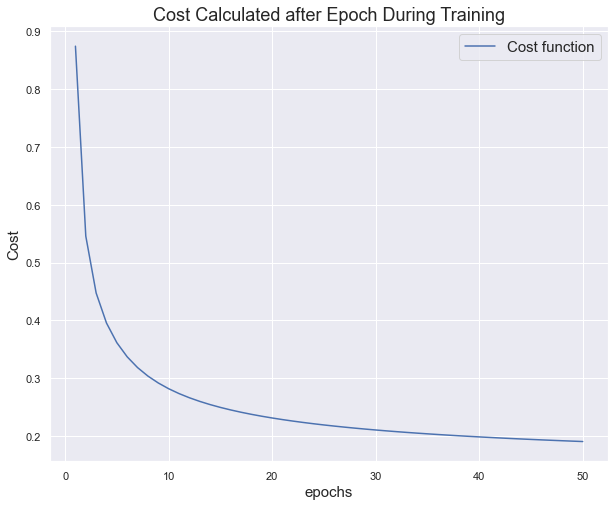

In [7]:
node.plot_cost_function()
plt.show()


cf_matrix = [[48  4]
 [ 7 41]] 



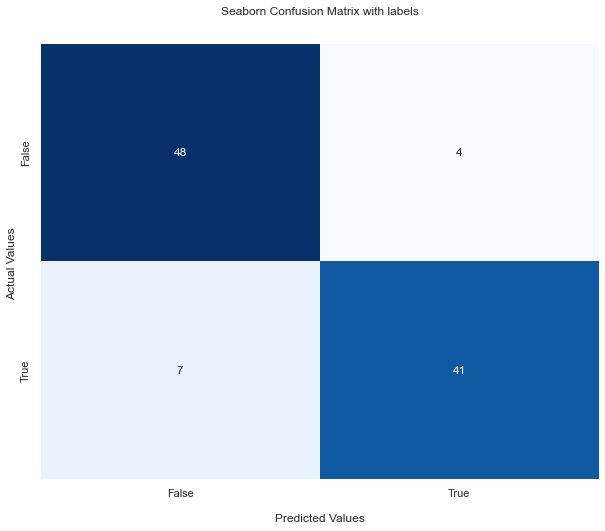

In [8]:
# Make predictions on testing data
y_pred = np.rint(node.predict(X_test))

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [9]:
#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90        52
           1       0.91      0.85      0.88        48

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



The accuracy is 0.88, which is pretty high when compared with other classification models. Therefore, the logistic regression model performs well on our main data set. Now we will do an experiment by increasing the epoch number to 1_000.

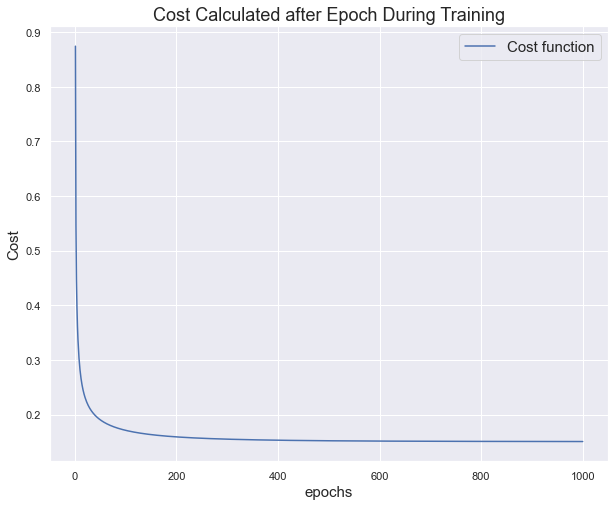

cf_matrix = [[46  6]
 [ 4 44]] 



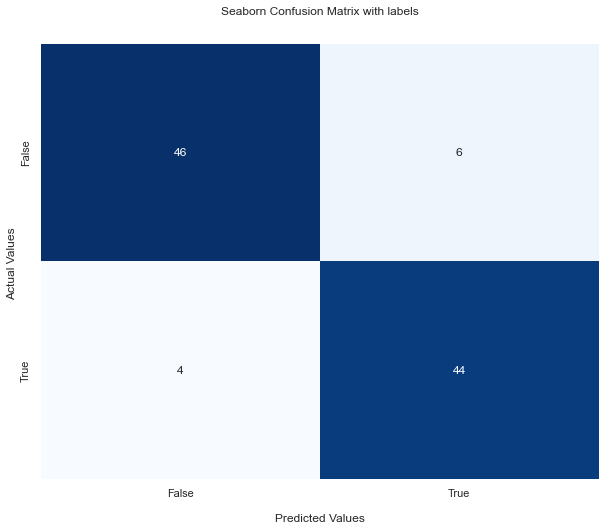

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        52
           1       0.88      0.92      0.90        48

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [11]:
# increase the epochs number to 1000
np.random.seed(2)
node2 = SingleNeuron(sigmoid, cross_entropy_loss)
node2.train(X_train, y_train, alpha=0.01, epochs=1000)

node2.plot_cost_function()
plt.show()

# Make predictions on testing data
y_pred = np.rint(node2.predict(X_test))

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

After increase the iteration to 1_000, we can see the accuracy increases to 0.9.

# Conclusion

From the result above, we can see that the logistic regression single neuron model performs well on the palmer penguins data set. Compared with the single neuron perceptron model, the logistic regression model has better performance. The main reason is that the logistic regression model can deal with non-linearly separable data.